# Finding optimal number of topics
Machinelearingplus.com approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

## How it works
1. Reads the corpus, dictionary and M1 from the folder /model
2. Computes coherence values for an increasing number of topics
3. Prints the coherence values
4. Graphs the coherence values


In [2]:
import nltk
import gensim
import re
import pickle
from gensim import corpora
from gensim.parsing.preprocessing import *
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import pyLDAvis.gensim
import numpy as np
import os
from pprint import pprint

# Figures
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Time
import time

import gensim
import pyLDAvis.gensim

import pandas as pd

import os
# For MAC OS
mallet_path = 'mallet-2.0.8/bin/mallet'
os.environ['MALLET_HOME'] = 'mallet-2.0.8'

# For Windows OS
#os.environ['MALLET_HOME'] = 'C:\\mallet'
#mallet_path = 'C:\\mallet\\bin\\mallet.bat'

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
import pickle

def openFile(filename):
    file = open(filename,'rb')
    data = pickle.load(file)
    file.close()
    print(filename, 'read.')
    return data

dictionary = openFile('model/dictionaryData')
M1 = openFile('model/M1Data')
corpus = openFile('model/corpusData')

model/dictionaryData read.
model/M1Data read.
model/corpusData read.


In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, random_seed_start, random_seed_limit):
    
    if random_seed_start != random_seed_limit:
        random_seed_range = range(random_seed_start, random_seed_limit)
        print('Now computing coherence values from', start, 'to', limit-1, 'with a step length of', step, 'for random seeds from', random_seed_start, 'to', random_seed_limit-1)
    else:
        random_seed_range = [random_seed_start]
        print('Now computing coherence values from', start, 'to', limit-1, 'with a step length of', step, 'for random seed', random_seed_start)

    print('------------------------------------------------------------------------------------------------')
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : First num of topics
    step : Step length when iterating num of topics
    random_seed_start : First random seed to iterate from
    random_seed_limit : Last random seed to iterate to (set to =random_seed_start if you want it fixed)

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        for random_seed in random_seed_range:
            t0 = time.time()
            model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary, random_seed=random_seed)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            c_v = coherencemodel.get_coherence()
            coherence_values.append(c_v)
            t = time.time() - t0

            print('Coherence with', num_topics, 'topics and random state', random_seed ,'is now computed. Result was:', c_v, 'and it took', round(t,1), 'seconds.')
    print('------------------------------------------------------------------------------------------------')
    print('Done!')
    return model_list, coherence_values

In [7]:
def coherencePlot(start, limit, step, c_v, figure):
    x = range(start, limit, step)
    xi = [*x]
    
    plt.plot(x, c_v)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.xticks(xi, x)
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()
    
    figure.savefig('plots/' + str(start) + '-' + str(limit) + '.pdf')

In [8]:
def coherencePlotWithRandomState(start, limit, rs_start, rs_limit, step, c_v, figure):
    x_label = []
    x_index = []
    
    for i in range(start, limit):
        for j in range(rs_start1, rs_limit1):
            x_label.append('(' + str(i) + ',' + str(j) + ')')
            
    for k in range (0, (limit-start)*(rs_limit-rs_start)):
        x_index.append(k)
    
    plt.plot(x_label, c_v)
    plt.xlabel("(Num Topics, Random State)")
    plt.ylabel("Coherence score")
    plt.xticks(x_index, x_label)
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()
    
    figure.savefig('plots/' + str(start) + '-' + str(limit) + '_' + str(rs_start) + '-' + str(rs_limit) + '.pdf')

In [9]:
def coherencePlotWithRandomStateMultiLines(start, limit, rs_start, rs_limit, step, c_v, figure):
    x_index = []
    index = start
    
    for i in range(rs_start, rs_limit):
        coherence = []
        x_label = []
        for j in range(start, limit):
            x_label.append(j)
            coherence.append(c_v[index])
            x_index.append(index)
            index += 1
        
        plt.plot(x_label, coherence)
    
    plt.plot(x_label, c_v)
    plt.xlabel("(Num Topics, Random State)")
    plt.ylabel("Coherence score")
    plt.xticks(x_index, x_label)
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()
    
    figure.savefig('plots/' + str(start) + '-' + str(limit) + '_' + str(rs_start) + '-' + str(rs_limit) + '.pdf')

IndexError: list index out of range

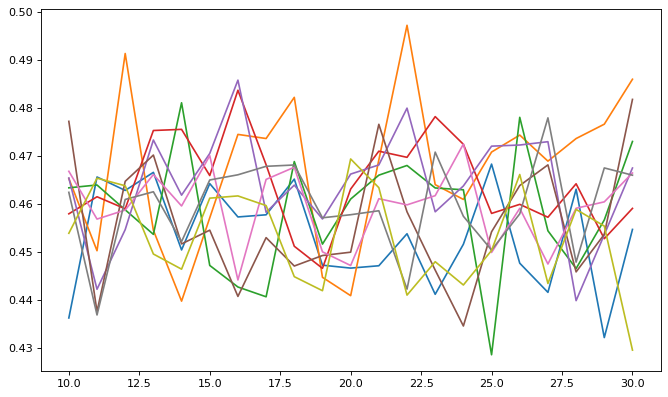

In [58]:
# Plot the graph and save it in /plots folder

f = plt.figure(figsize=(10, 6), dpi=80)
coherencePlotWithRandomStateMultiLines(start1, limit1, rs_start1, rs_limit1, step1, coherence_values1, f)

# PANDAS

## Coherence score over topics, Stepping every 4th
Stepping from `start3` to `limit3` with a step length of `step3` and random state variable `random_state3`

In [10]:
start3 = 2
limit3 = 100
step3 = 4

random_state3 = 4

In [11]:
# Can take a long time to run

model_list, coherence_values3 = compute_coherence_values(dictionary=dictionary, corpus=M1, texts=corpus, limit=limit3, start=start3, step=step3, random_seed_start=random_state3, random_seed_limit=random_state3)

Now computing coherence values from 2 to 99 with a step length of 4 for random seed 4
------------------------------------------------------------------------------------------------
Coherence with 2 topics and random state 4 is now computed. Result was: 0.33245401307370975 and it took 49.7 seconds.
Coherence with 6 topics and random state 4 is now computed. Result was: 0.45290606522444293 and it took 49.0 seconds.
Coherence with 10 topics and random state 4 is now computed. Result was: 0.45687951073639477 and it took 51.7 seconds.
Coherence with 14 topics and random state 4 is now computed. Result was: 0.4972044502388814 and it took 52.1 seconds.
Coherence with 18 topics and random state 4 is now computed. Result was: 0.46305870072918637 and it took 52.7 seconds.
Coherence with 22 topics and random state 4 is now computed. Result was: 0.44701270321044734 and it took 54.2 seconds.
Coherence with 26 topics and random state 4 is now computed. Result was: 0.46603437456958974 and it took 5

In [12]:
# Print the coherence scores and save to pandas table
nrTopics_randomState3 = []
df_coherence_values3 = pd.DataFrame(columns=['Number of topics', 'Random variable', 'Coherence score'])

for m, cv in zip(range(start3, limit3, step3), coherence_values3):
    # create new row
    new_row = {'Number of topics':m, 'Random variable':random_state3, 'Coherence score':cv}
    #append row to the dataframe
    df_coherence_values3 = df_coherence_values3.append(new_row, ignore_index=True)
    
    # used to calculate highest coherence
    nrTopics_randomState3.append('nrTopics: ' + str(m) + ', randomState: ' + str(random_state3))
# print coherence table
df_coherence_values3

{'Num_Topics': 2, 'Random_Variable': 4, 'Coherence_Score': 0.33245401307370975}
{'Num_Topics': 6, 'Random_Variable': 4, 'Coherence_Score': 0.45290606522444293}
{'Num_Topics': 10, 'Random_Variable': 4, 'Coherence_Score': 0.45687951073639477}
{'Num_Topics': 14, 'Random_Variable': 4, 'Coherence_Score': 0.4972044502388814}
{'Num_Topics': 18, 'Random_Variable': 4, 'Coherence_Score': 0.46305870072918637}
{'Num_Topics': 22, 'Random_Variable': 4, 'Coherence_Score': 0.44701270321044734}
{'Num_Topics': 26, 'Random_Variable': 4, 'Coherence_Score': 0.46603437456958974}
{'Num_Topics': 30, 'Random_Variable': 4, 'Coherence_Score': 0.4434469590672661}
{'Num_Topics': 34, 'Random_Variable': 4, 'Coherence_Score': 0.438426071079072}
{'Num_Topics': 38, 'Random_Variable': 4, 'Coherence_Score': 0.44336473459007975}
{'Num_Topics': 42, 'Random_Variable': 4, 'Coherence_Score': 0.4392790853863096}
{'Num_Topics': 46, 'Random_Variable': 4, 'Coherence_Score': 0.42410609135738675}
{'Num_Topics': 50, 'Random_Variable

,Num_Topics,Random_Variable,Coherence_Score
0,2.0,4.0,0.332454
1,6.0,4.0,0.452906
2,10.0,4.0,0.456880
3,14.0,4.0,0.497204
4,18.0,4.0,0.463059
5,22.0,4.0,0.447013
6,26.0,4.0,0.466034
7,30.0,4.0,0.443447
8,34.0,4.0,0.438426
9,38.0,4.0,0.443365


optimalNumberOfTopics/topics2-98_rv4.csv saved.


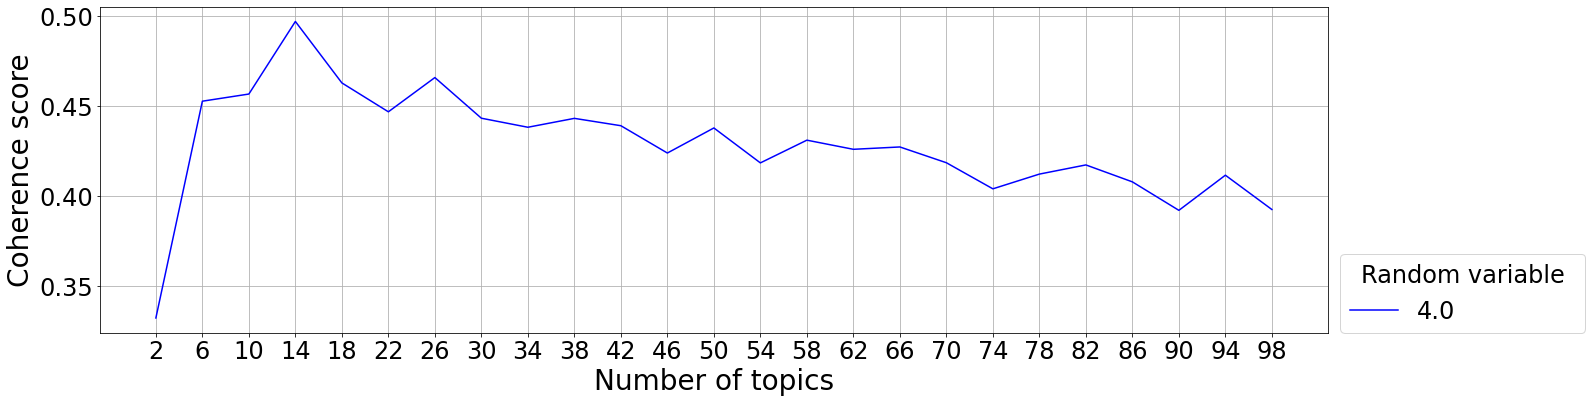

optimalNumberOfTopics/topics2-98_rv4.pdf saved.


Random variable,4.0
Number of topics,
2.0,0.332454
6.0,0.452906
10.0,0.456880
14.0,0.497204
18.0,0.463059
22.0,0.447013
26.0,0.466034
30.0,0.443447
34.0,0.438426


In [111]:
df = df_coherence_values3.copy()

save(df, 'topics2-98_rv4')
df = pivot(df)
plot(df, 'topics2-98_rv4')

df

### Result
This gives us the 5 highest coherence values:

In [13]:
# Print top 5 best coherence values
i=1
for cv, name in sorted(zip(coherence_values3, nrTopics_randomState3), reverse=True)[:5]:
    print(str(i) + '. Coherence score:', round(cv, 3), name)
    i+=1

1. Coherence score: 0.497 nrTopics: 14, randomState: 4
2. Coherence score: 0.466 nrTopics: 26, randomState: 4
3. Coherence score: 0.463 nrTopics: 18, randomState: 4
4. Coherence score: 0.457 nrTopics: 10, randomState: 4
5. Coherence score: 0.453 nrTopics: 6, randomState: 4


## Coherence score over topics and random state
Stepping number of topics from `start1` to `limit1` with a step length of `step1`

and Stepping random state from `rs_start1` to `rs_limit1`

In [114]:
start1 = 10
limit1 = 31
step1 = 1

rs_start1 = 1
rs_limit1 = 11

In [116]:
# Can take a long time to run

model_list, coherence_values1 = compute_coherence_values(dictionary=dictionary, corpus=M1, texts=corpus, limit=limit1, start=start1, step=step1, random_seed_start=rs_start1, random_seed_limit=rs_limit1)

Now computing coherence values from 10 to 30 with a step length of 1 for random seeds from 1 to 10
------------------------------------------------------------------------------------------------
Coherence with 10 topics and random state 1 is now computed. Result was: 0.43555948038026593 and it took 51.9 seconds.
Coherence with 10 topics and random state 2 is now computed. Result was: 0.4602207336836958 and it took 52.0 seconds.
Coherence with 10 topics and random state 3 is now computed. Result was: 0.47262616678776376 and it took 52.2 seconds.
Coherence with 10 topics and random state 4 is now computed. Result was: 0.45687951073639477 and it took 51.9 seconds.
Coherence with 10 topics and random state 5 is now computed. Result was: 0.45425422663258264 and it took 51.3 seconds.
Coherence with 10 topics and random state 6 is now computed. Result was: 0.4651870235590444 and it took 51.0 seconds.
Coherence with 10 topics and random state 7 is now computed. Result was: 0.4717738069116441 

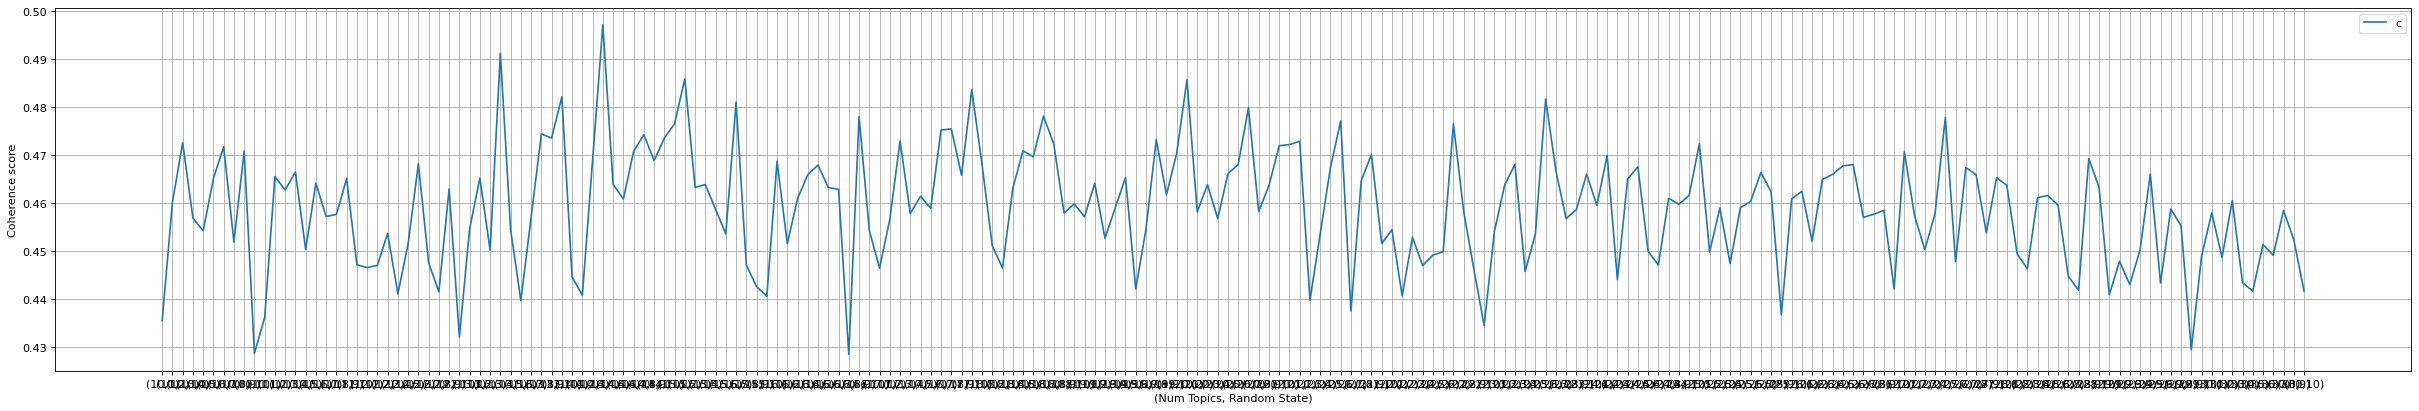

In [19]:
# Plot the graph and save it in /plots folder

f = plt.figure(figsize=(38, 6), dpi=80)
coherencePlotWithRandomState(start1, limit1, rs_start1, rs_limit1, step1, coherence_values1, f)

In [129]:
coherence_values1

[0.43555948038026593,
 0.4602207336836958,
 0.47262616678776376,
 0.45687951073639477,
 0.45425422663258264,
 0.4651870235590444,
 0.4717738069116441,
 0.45191760773131034,
 0.4708935690331284,
 0.4287226350641678,
 0.43617929822778884,
 0.4655757056765676,
 0.4627710797589551,
 0.4665403422224727,
 0.4503655678363053,
 0.46419499095583916,
 0.45724276733469327,
 0.457692401411032,
 0.4651346151753291,
 0.44718676650972883,
 0.4465786299032745,
 0.44706683687435245,
 0.45374280378020554,
 0.4411174679894065,
 0.45155108069921207,
 0.46826369284394304,
 0.4476012315322127,
 0.44152241116412677,
 0.4630203093784953,
 0.4320932328784269,
 0.4546427160232363,
 0.46525147744437617,
 0.4502018534914915,
 0.4913226830455449,
 0.45446301930269856,
 0.4396893040464644,
 0.4570553800144515,
 0.47445405968784926,
 0.47359528494769837,
 0.4821824818911464,
 0.4446556359226682,
 0.4408315125387397,
 0.46912893799926136,
 0.4972044502388814,
 0.4639763697607874,
 0.46089599212288324,
 0.470775809947

In [135]:
# Print the coherence scores
nrTopics_randomState = []
df_coherence_values1 = pd.DataFrame(columns=['Number of topics', 'Random variable', 'Coherence score'])
cv_index = 0

for m in range(start1, limit1, step1):
    for n in range(rs_start1, rs_limit1):
        # used to calculate highest coherence
        nrTopics_randomState.append('nrTopics: ' + str(m) + ', randomState: ' + str(n))
        
        # save to pandas table
        new_row = {'Number of topics':m, 'Random variable':n, 'Coherence score':coherence_values1[cv_index]}
        df_coherence_values1 = df_coherence_values1.append(new_row, ignore_index=True)
        
        # increase index in every single iteration
        cv_index += 1

# print coherence table
df_coherence_values1

,Number of topics,Random variable,Coherence score
0,10.0,1.0,0.435559
1,10.0,2.0,0.460221
2,10.0,3.0,0.472626
3,10.0,4.0,0.456880
4,10.0,5.0,0.454254
...,...,...,...
205,30.0,6.0,0.451420
206,30.0,7.0,0.449142
207,30.0,8.0,0.458511
208,30.0,9.0,0.452461


In [137]:
def makeHex(red, green, blue):
    colorList = [red,green,blue]
    hexColor = "#"
     
    for color in colorList:
        if color < 16:
            hexa = hex(color).replace('0x', '0')
        else:
            hexa = hex(color).replace('0x', '')
        
        hexColor = hexColor + hexa

    return hexColor

def getColorRange(numberOfColors):
    hexColorList = []

    step = 1
    colorRange = 255
    n = colorRange

    red = colorRange
    green = 0
    blue = 0

    for i in range(0,n,step):
        hexColorList.append(makeHex(red,green,blue))
        green += 1

    for i in range(n,0,-step):
        hexColorList.append(makeHex(red,green,blue))
        red -= 1

    for i in range(0,n,step):
        hexColorList.append(makeHex(red,green,blue))
        blue += 1

    for i in range(n,0,-step):
        hexColorList.append(makeHex(red,green,blue))
        green -= 1

    for i in range(0,n,step):
        hexColorList.append(makeHex(red,green,blue))
        red += 1

    for i in range(n,0,-step):
        hexColorList.append(makeHex(red,green,blue))
        blue -= 1

    index = len(hexColorList)
    colorRange = []

    for i in range(0,numberOfColors):
        colorRange.append(hexColorList[int(index/numberOfColors)*i])
        
    return colorRange  


In [145]:
def save(df, title):
    df.to_csv(r'optimalNumberOfTopics/' + title + '.csv', index = False)
    print('optimalNumberOfTopics/' + title + '.csv' + ' saved.')

def plot(df, title):
    SMALL_SIZE = 24
    MEDIUM_SIZE = 28
    BIGGER_SIZE = 32

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    LINE_STYLES = ['o-', 's-','o-', 's-','o-', 's-','o-', 's-','o-', 's-']
    
    colors = ["blue", "green", "orange", "magenta", "red"]
    colorsMore = getColorRange(len(df)-10)
    
# Plots the graph
    df.plot(figsize=(22, 6), color = colorsMore, grid=True, style = LINE_STYLES)
    plt.ylabel('Coherence score')
    plt.legend(title = 'Random variable', bbox_to_anchor=(1.01, 0, 0.2, 1), loc='lower left', mode="expand", borderaxespad=0.)
    
# CHANGE XTICKS HERE
    plt.xticks(np.arange(10, len(df)+10, 1))
    
    plt.savefig('optimalNumberOfTopics/' + title + '.pdf', bbox_inches='tight')
    plt.show()  
    
    print('optimalNumberOfTopics/' + title + '.pdf' + ' saved.')

def pivot(df):
    return pd.pivot_table(df, values="Coherence score", index=["Number of topics"], columns=["Random variable"])

optimalNumberOfTopics/topics10-30_rv1-10.csv saved.


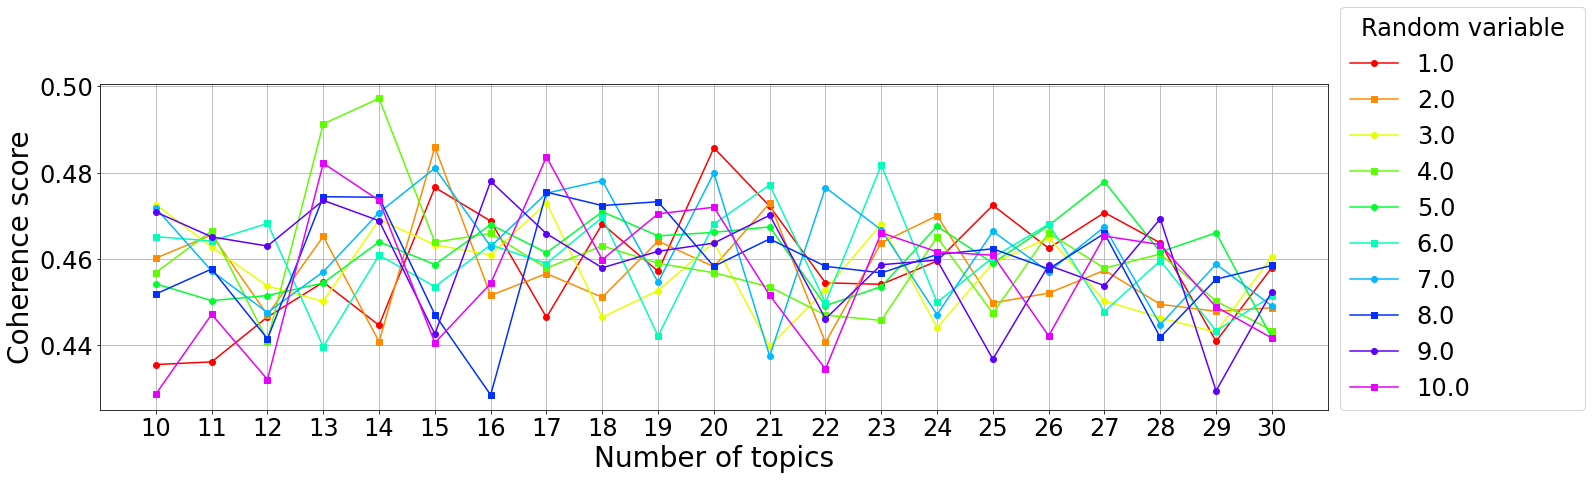

optimalNumberOfTopics/topics10-30_rv1-10.pdf saved.


Random variable,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Number of topics,,,,,,,,,,
10.0,0.435559,0.460221,0.472626,0.456880,0.454254,0.465187,0.471774,0.451918,0.470894,0.428723
11.0,0.436179,0.465576,0.462771,0.466540,0.450366,0.464195,0.457243,0.457692,0.465135,0.447187
12.0,0.446579,0.447067,0.453743,0.441117,0.451551,0.468264,0.447601,0.441522,0.463020,0.432093
13.0,0.454643,0.465251,0.450202,0.491323,0.454463,0.439689,0.457055,0.474454,0.473595,0.482182
14.0,0.444656,0.440832,0.469129,0.497204,0.463976,0.460896,0.470776,0.474314,0.468881,0.473592
15.0,0.476585,0.485956,0.463319,0.463905,0.458731,0.453616,0.481048,0.447133,0.442637,0.440598
16.0,0.468794,0.451582,0.460973,0.465956,0.467975,0.463287,0.462908,0.428512,0.478015,0.454354
17.0,0.446485,0.456619,0.472980,0.457897,0.461456,0.458946,0.475269,0.475505,0.465874,0.483664
18.0,0.468128,0.451134,0.446528,0.463059,0.470958,0.469675,0.478163,0.472394,0.457982,0.459871


In [148]:
df = df_coherence_values1.copy()

save(df, 'topics10-30_rv1-10')
df = pivot(df)
plot(df, 'topics10-30_rv1-10')

df

### Result
This gives us the top 5 highest coherence scores:

In [17]:
# Print top 5 best coherence values
i=1
for cv, name in sorted(zip(coherence_values1, nrTopics_randomState), reverse=True)[:5]:
    print(str(i) + '. Coherence score:', round(cv, 3), name)
    i+=1

1. Coherence score: 0.497 nrTopics: 14, randomState: 4
2. Coherence score: 0.491 nrTopics: 13, randomState: 4
3. Coherence score: 0.486 nrTopics: 15, randomState: 2
4. Coherence score: 0.486 nrTopics: 20, randomState: 1
5. Coherence score: 0.484 nrTopics: 17, randomState: 10


## Coherence score over topics, Stepping every one
Now we want to be more exact but since the coherence is dropping with higher number of topics we reduce the upper limit.

Stepping from `start2` to `limit2` with a step length of `step2`

In [429]:
start2 = 8
limit2 = 30
step2 = 1

random_state2 = 4


In [428]:
# Can take a long time to run
model_list2, coherence_values2 = compute_coherence_values(dictionary=dictionary, corpus=M1, texts=corpus, limit=limit2, start=start2, step=step2, random_seed_start=random_state2, random_seed_limit=random_state2)

Now computing coherence values from 8 to 29 with a step length of 1 for random seed 4
------------------------------------------------------------------------------------------------
Coherence with 8 topics and random state 4 is now computed. Result was: 0.4392082168420458 and it took 50.2 seconds.
Coherence with 9 topics and random state 4 is now computed. Result was: 0.4759659234919878 and it took 50.1 seconds.
Coherence with 10 topics and random state 4 is now computed. Result was: 0.45687951073639477 and it took 49.9 seconds.
Coherence with 11 topics and random state 4 is now computed. Result was: 0.4665403422224727 and it took 50.6 seconds.
Coherence with 12 topics and random state 4 is now computed. Result was: 0.4411174679894065 and it took 50.3 seconds.
Coherence with 13 topics and random state 4 is now computed. Result was: 0.4913226830455449 and it took 51.1 seconds.
Coherence with 14 topics and random state 4 is now computed. Result was: 0.4972044502388814 and it took 51.5 s

In [434]:
# Print the coherence scores
nrTopics_randomState2 = []

for m, cv in zip(range(start2, limit2, step2), coherence_values2):
    print("Num Topics =", m , "and Random Variable =", random_state2 , "has Coherence Value of", round(cv, 4))

    nrTopics_randomState2.append('nrTopics: ' + str(m) + ', randomState: ' + str(random_state2))

Num Topics = 8 and Random Variable = 4 has Coherence Value of 0.4392
Num Topics = 9 and Random Variable = 4 has Coherence Value of 0.476
Num Topics = 10 and Random Variable = 4 has Coherence Value of 0.4569
Num Topics = 11 and Random Variable = 4 has Coherence Value of 0.4665
Num Topics = 12 and Random Variable = 4 has Coherence Value of 0.4411
Num Topics = 13 and Random Variable = 4 has Coherence Value of 0.4913
Num Topics = 14 and Random Variable = 4 has Coherence Value of 0.4972
Num Topics = 15 and Random Variable = 4 has Coherence Value of 0.4639
Num Topics = 16 and Random Variable = 4 has Coherence Value of 0.466
Num Topics = 17 and Random Variable = 4 has Coherence Value of 0.4579
Num Topics = 18 and Random Variable = 4 has Coherence Value of 0.4631
Num Topics = 19 and Random Variable = 4 has Coherence Value of 0.459
Num Topics = 20 and Random Variable = 4 has Coherence Value of 0.4568
Num Topics = 21 and Random Variable = 4 has Coherence Value of 0.4535
Num Topics = 22 and Rando

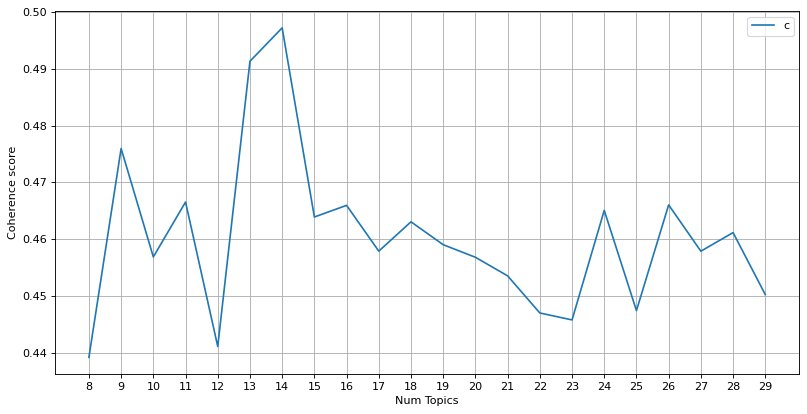

In [435]:
f = plt.figure(figsize=(12, 6), dpi=80)

coherencePlot(start2, limit2, step2, coherence_values2, f)

### Result
This gives us the 5 highest coherence values:

In [2]:
# Print top 5 best coherence values
i=1
for cv, name in sorted(zip(coherence_values2, nrTopics_randomState2), reverse=True)[:5]:
    print(str(i) + '. Coherence score:', round(cv, 3), name)
    i+=1

NameError: name 'coherence_values2' is not defined